In [35]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *

In [36]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('gene_high_throughput_sequencing.csv')
df.head()

,Patient_id,Diagnosis,LOC643837,LOC100130417,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,...,CLIC2,RPS4Y1,ZFY,PRKY,USP9Y,DDX3Y,CD24,CYorf15B,KDM5D,EIF1AY
0,STT5425_Breast_001_normal,normal,1.257614,2.408148,13.368622,9.494779,20.880435,12.722017,9.494779,54.349694,...,4.761250,1.257614,1.257614,1.257614,1.257614,1.257614,23.268694,1.257614,1.257614,1.257614
1,STT5427_Breast_023_normal,normal,4.567931,16.602734,42.477752,25.562376,23.221137,11.622386,14.330573,72.445474,...,6.871902,1.815112,1.815112,1.815112,1.815112,1.815112,10.427023,1.815112,1.815112,1.815112
2,STT5430_Breast_002_normal,normal,2.077597,3.978294,12.863214,13.728915,14.543176,14.141907,6.232790,57.011005,...,7.096343,2.077597,2.077597,2.077597,2.077597,2.077597,22.344226,2.077597,2.077597,2.077597
3,STT5439_Breast_003_normal,normal,2.066576,8.520713,14.466035,7.823932,8.520713,2.066576,10.870009,53.292034,...,5.200770,2.066576,2.066576,2.066576,2.066576,2.066576,49.295538,2.066576,2.066576,2.066576
4,STT5441_Breast_004_normal,normal,2.613616,3.434965,12.682222,10.543189,26.688686,12.484822,1.364917,67.140393,...,11.227770,1.364917,1.364917,1.364917,1.364917,1.364917,23.627911,1.364917,1.364917,1.364917


In [3]:
df.shape

(72, 15750)

In [11]:
mean_normal=df[df.Diagnosis=='normal'].mean(axis=0)
mean_ep=df[df.Diagnosis=='early neoplasia'].mean(axis=0)
mean_cancer =df[df.Diagnosis=='cancer'].mean(axis=0)

In [33]:
def fold_change(T,C):
    if T>C:
        return T/C
    else:
        return -C/T

In [34]:
df1=pd.DataFrame(mean_normal,columns=['normal'])
df1.insert(1,'early neoplasia',mean_ep)
df1.insert(2,'cancer',mean_cancer)
df1['group1']= df1.apply(lambda row: fold_change(row['early neoplasia'], row['normal']), axis=1)
df1['group2']= df1.apply(lambda row: fold_change(row['cancer'], row['early neoplasia']), axis=1)
df1

,normal,early neoplasia,cancer,group1,group2
LOC643837,2.681277,2.510894,2.186060,-1.067858,-1.148593
LOC100130417,4.368497,8.721781,8.190456,1.996517,-1.064871
SAMD11,15.159566,18.531325,23.692614,1.222418,1.278517
NOC2L,15.374351,15.071854,16.468034,-1.020070,1.092635
KLHL17,21.459886,24.152469,25.035813,1.125471,1.036574
PLEKHN1,9.374537,10.793160,13.870940,1.151327,1.285160
C1orf170,8.105567,9.009031,9.677439,1.111462,1.074193
HES4,58.080871,64.670644,67.162763,1.113459,1.038536
ISG15,34.983861,37.296084,91.706112,1.066094,2.458867
AGRN,62.870812,75.707467,73.359613,1.204175,-1.032005


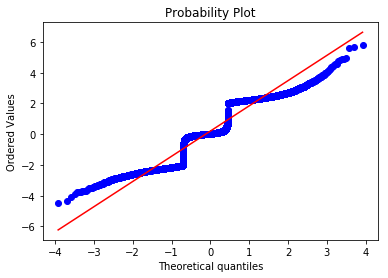

In [37]:
stats.probplot(df1['group1']-df1['group2'], dist = "norm", plot = pylab)
pylab.show()

In [50]:
def get_ttest_pval(a,b):
    return a+b
    return stats.ttest_rel(a,b).pvalue

In [51]:
df1['ttest_rel_pvalue']= df1.apply(lambda row: get_ttest_pval(row['group1'], row['group2']), axis=1)

In [52]:
df1

,normal,early neoplasia,cancer,group1,group2,ttest,ttest_rel_pvalue
LOC643837,2.681277,2.510894,2.186060,-1.067858,-1.148593,2.308067e-49,-2.216451
LOC100130417,4.368497,8.721781,8.190456,1.996517,-1.064871,2.308067e-49,0.931646
SAMD11,15.159566,18.531325,23.692614,1.222418,1.278517,2.308067e-49,2.500935
NOC2L,15.374351,15.071854,16.468034,-1.020070,1.092635,2.308067e-49,0.072565
KLHL17,21.459886,24.152469,25.035813,1.125471,1.036574,2.308067e-49,2.162044
PLEKHN1,9.374537,10.793160,13.870940,1.151327,1.285160,2.308067e-49,2.436487
C1orf170,8.105567,9.009031,9.677439,1.111462,1.074193,2.308067e-49,2.185655
HES4,58.080871,64.670644,67.162763,1.113459,1.038536,2.308067e-49,2.151994
ISG15,34.983861,37.296084,91.706112,1.066094,2.458867,2.308067e-49,3.524961
AGRN,62.870812,75.707467,73.359613,1.204175,-1.032005,2.308067e-49,0.172170
